# Data Visualization assignment

First of all the necessary library to run the code are imported and is set the “%matplotlib inline command” to plot the graphs immediately after the code box. Then, using the pandas library is loaded and displayed the dataset “Healthy_lifestyle_city_2021.csv”.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

%matplotlib inline

In [2]:
#Dataset loading

df = pd.read_csv('healthy_lifestyle_city_2021.csv')
df

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
0,Amsterdam,1,1858,£1.92,20.40%,81.2,30.93,1434,7.44,422,1048,£34.90
1,Sydney,2,2636,£1.48,29.00%,82.1,26.86,1712,7.22,406,1103,£41.66
2,Vienna,3,1884,£1.94,20.10%,81.0,17.33,1501,7.29,132,1008,£25.74
3,Stockholm,4,1821,£1.72,20.60%,81.8,19.63,1452,7.35,129,598,£37.31
4,Copenhagen,5,1630,£2.19,19.70%,79.8,21.24,1380,7.64,154,523,£32.53
5,Helsinki,6,1662,£1.60,22.20%,80.4,13.08,1540,7.80,113,309,£35.23
6,Fukuoka,7,2769,£0.78,4.30%,83.2,-,1644,5.87,35,539,£55.87
7,Berlin,8,1626,£1.55,22.30%,80.6,39.41,1386,7.07,254,1729,£26.11
8,Barcelona,9,2591,£1.19,23.80%,82.2,65.19,1686,6.40,585,2344,£37.80
9,Vancouver,10,1938,£1.08,29.40%,81.7,24.26,1670,7.23,218,788,£31.04


## Exercise a
Check if the dataset has missing values and choose a way to correct them. Motivate your choice.

First “-” value is replaced with the proper null value: NaN (from the NumPy library). Then is checked how many null values have each row. In those rows with null values, the reasoning followed to replace NaN values is different: for Sunshine Hours, since the missing value is 1, the unit of measurement is certain (hours) and the data can be easily retrieved, the true value of the average annual lighting hours in Geneva was entered. For the remaining two columns with missing values the methodology used is replacing with the mean, after having converted the values of the columns to float numbers, to make the replace function work. The mean is chosen because it is hard to predict the true value of the missing values, due to the diversity of cities included in the dataset. For the pollution index, it would have been possible to look up the true value, but it is not clear in what year the measurement was taken and what the unit of measurement was. For the annual average hours worked, the year of measurement is also unknown. It would have been possible to use statistical methods for more accurate measurement but, on the other hand, it would have been very time-consuming. At the end is checked if there are some NaN values remaining. 

In [3]:
#Check how many and where are NaN values inside the columns of the dataframe

df = df.replace('-', np.NaN)
df.isna().sum()

City                                       0
Rank                                       0
Sunshine hours(City)                       1
Cost of a bottle of water(City)            0
Obesity levels(Country)                    0
Life expectancy(years) (Country)           0
Pollution(Index score) (City)              1
Annual avg. hours worked                  11
Happiness levels(Country)                  0
Outdoor activities(City)                   0
Number of take out places(City)            0
Cost of a monthly gym membership(City)     0
dtype: int64

In [4]:
#converting the columns to float
df = df.astype({'Pollution(Index score) (City)': float, 'Annual avg. hours worked': float})

#filling the true value of sunshine hours for Geneva (1830)
df['Sunshine hours(City)'] = df['Sunshine hours(City)'].fillna(1830)

#filling the 'Pollution(Index score) (City)' and the 'Annual avg. hours worked' NaN with the mean of the column
for i in df.columns[[6,7]]:
    mean = round(df[i].mean(),2) #round the mean for better visualization and to uniform the values in the columns
    df[i] = df[i].replace({np.NaN : mean})

df['Annual avg. hours worked'] = round(df['Annual avg. hours worked']) #round for uniforming the values

df.isna().sum()

City                                      0
Rank                                      0
Sunshine hours(City)                      0
Cost of a bottle of water(City)           0
Obesity levels(Country)                   0
Life expectancy(years) (Country)          0
Pollution(Index score) (City)             0
Annual avg. hours worked                  0
Happiness levels(Country)                 0
Outdoor activities(City)                  0
Number of take out places(City)           0
Cost of a monthly gym membership(City)    0
dtype: int64

In [5]:
#Removing space in dataset columns name, to avoid errors during the code developing due to unexpected spaces
old_col = df.columns
h = []
j = ''
for i in df.columns:
    j = i.replace(' ','_')
    h.append(j)
df.columns = h

## Exercise b
Plot a bar chart describing the Happiness levels for each city. The bars should be colored in gray except for the bars corresponding to Italian cities which should be colored in dark blue.

The barplot function from the seaborn library is used. To give the dark blue colour only to the city of Milan a for cycle is used.

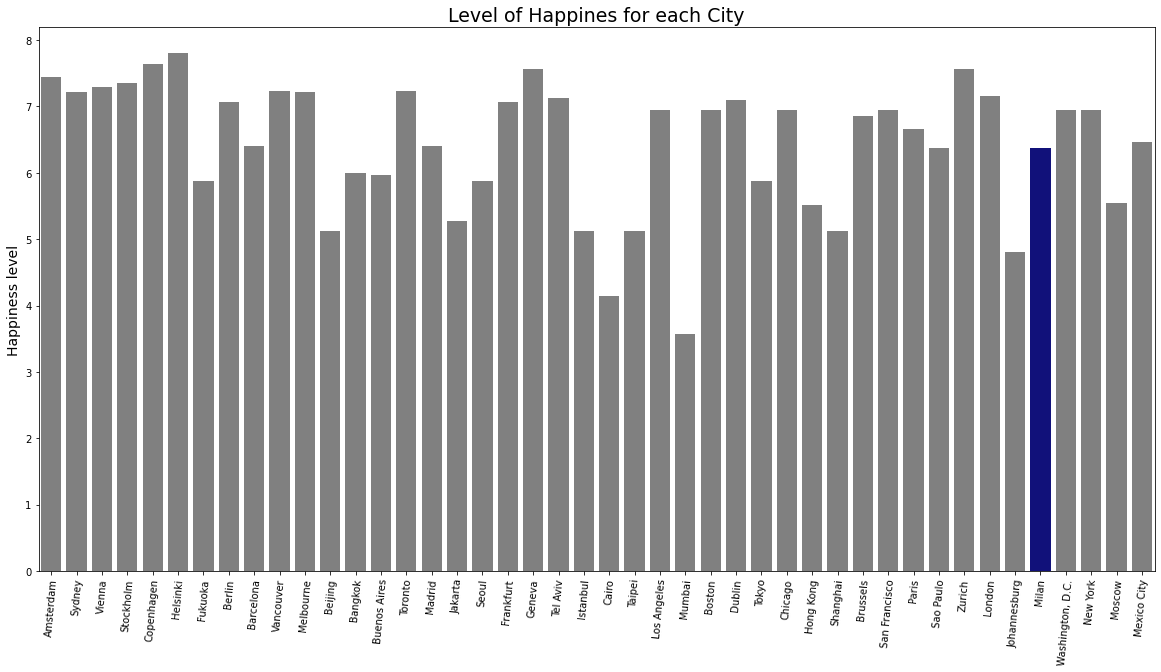

In [6]:
#For loop to assign the color to each bar
colours = []
for i in df['City']:
    if i == 'Milan':
        colours.append('darkblue')
    else:
        colours.append('grey')

#Acctual plotting code
first = plt.figure(figsize=(20,10))
barchart = sns.barplot(x = 'City', y = 'Happiness_levels(Country)', palette = colours, data = df)
plt.title('Level of Happines for each City', fontsize = 19)
plt.xticks(rotation = 85)
plt.ylabel('Happiness level', fontsize = 14)
barchart.set(xlabel=None)

plt.show() #To hide any other output but the graph

In [7]:
#Remove symbols and convert into float object columns to better coding later on

#define the function to remove the symbols (given as input)
def remove(df,col_name,symbol): #define the function to remove the symbols (given as input)
    l = []
    for i in df[col_name]:
        i = i.replace(symbol, '')
        l.append(i)
    df[col_name] = l

#Applying the function to three differetn rows
remove(df,'Cost_of_a_bottle_of_water(City)','£')
remove(df,'Cost_of_a_monthly_gym_membership(City)','£')
remove(df,'Obesity_levels(Country)','%')

#Converting to float
df = df.astype({'City': str, 'Sunshine_hours(City)': int, 'Cost_of_a_bottle_of_water(City)': float, 'Obesity_levels(Country)':float, 'Cost_of_a_monthly_gym_membership(City)':float}) #Converting to float

## Exercise c

Plot the correlation between any two pair of variables as a heatmap with a custom palette. What can you say about the result?

In the plotted correlation matrix it can be seen that some variables are correlated, although this does not imply causality between them. The closer it is to +1, the greater the positive correlation between two variables is, in the sense that as one variable grows so does the other. The opposite is true if you approach -1. From the correlation matrix we can see that the more correlated variable is the cost of a bottle of water, positively correlated with life expectancy (0,61) and happiness level (0,81), and negatively correlated with pollution level (-0,73).  Life expectancy is positively correlated with happiness level (0,72) and negatively correlated with pollution level (-0,55).
Happiness level is negatively correlated (-0,76) with pollution level. Outdoor activities is positively correlated with take-out places (0,53). Only the correlation above 0,5 or below -0,5 have been taken into account.


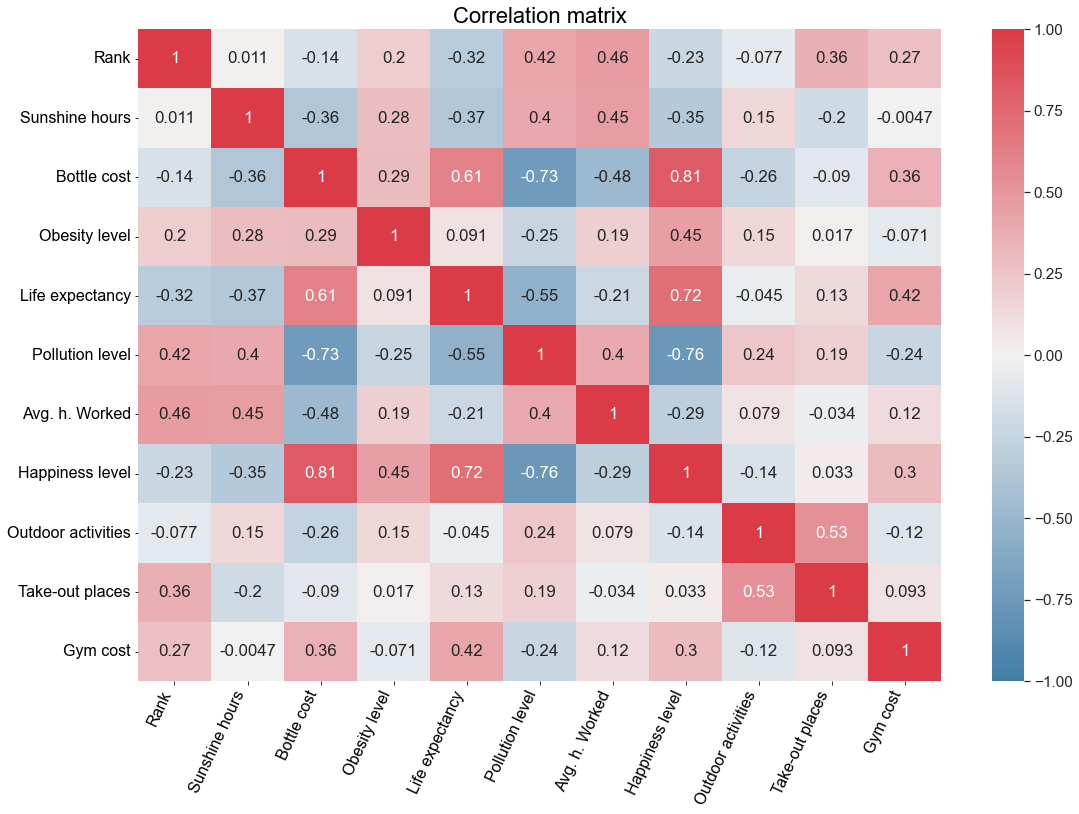

In [8]:
#Computing the correlation matrix
corr = df.corr()
labels = ['Rank','Sunshine hours','Bottle cost','Obesity level','Life expectancy','Pollution level','Avg. h. Worked','Happiness level','Outdoor activities','Take-out places','Gym cost']
corr.columns = labels
corr.index = labels

#Plotting of the correlation matrix using seaborn library, using a diverging palette to better highlight the high correlated values
pal = sns.diverging_palette(240, 10, as_cmap=True)
plt.figure(figsize=(18,12))
plt.title('Correlation matrix', fontsize = 22)
sns.set(font_scale=1.4)
cormap = sns.heatmap(corr,vmin=-1, vmax=1, annot=True, cmap = pal)
cormap.set_xticklabels(cormap.get_xmajorticklabels(), fontsize = 16, rotation = 65, ha = 'right')
cormap.set_yticklabels(cormap.get_ymajorticklabels(), fontsize = 16)
plt.show()

## Exercise d
Divide the cities into 6 groups based on the first letter of their name (A-D, E-H, I-L, M-P, Q-U, V-Z).
Plot a bar chart for the “Number of take out places” variable with six bins (A-D, E-H, I-L, M-P, Q-U,
V-Z). Each bin contains the sum of the values of “Number of take out places” for the cities that fall
in that bin.

First, a new column in the dataset is created, in which is marked the category of each city, based on the first letter of its name. Then the rows are grouped based on the new column, named "City_Group", and the value of each row is summed with the other values of the rows having the same category, for each column. Then the value of the number of the take-out places is plotted for each group of cities, with a bar chart. The colour of the bars is the same because all the bars refer to the same value on the y-axes.

In [9]:
#Creating an empty column in the dataset
City_group = []
for i in df['City']:
    City_group.append(np.NaN)
df['City_Group'] = City_group

#Creating empty list for each group of city
AD = []
EH = []
IL = []
MP = []
QU = []
VZ = []

#defining the function to add each city to the right list, and then to mark the right group of cities for each city in the new column "City_Group"
def City_Group(list,letter_list,list_name):
    #add the city to the list
    for i in df['City']:
        if i[0] in letter_list:
            list.append(i)
    #mark the right city group in the right row
    count = -1
    for i in df['City']:
        count += 1
        if i in list:
            df.loc[count, 'City_Group'] = list_name

#Applying the function for each group of cities
City_Group(AD,['A','B','C','D'],'A-D')
City_Group(EH,['E','F','G','H'],'E-H')
City_Group(IL,['I','J','K','L'],'I-L')
City_Group(MP,['M','N','O','P'],'M-P')
City_Group(QU,['Q','R','S','T','U'],'Q-U')
City_Group(VZ,['V','W','X','Y','Z'],'V-Z')

#rename the columns to put City_group close to the actual name of cities to check if everything worked well
col = ['City_Group','City', 'Rank', 'Sunshine_hours(City)',
       'Cost_of_a_bottle_of_water(City)', 'Obesity_levels(Country)',
       'Life_expectancy(years)_(Country)', 'Pollution(Index_score)_(City)',
       'Annual_avg._hours_worked', 'Happiness_levels(Country)',
       'Outdoor_activities(City)', 'Number_of_take_out_places(City)',
       'Cost_of_a_monthly_gym_membership(City)']
df = df[col]

#Grouping cities based on city groups
df_g = df.groupby('City_Group').sum()

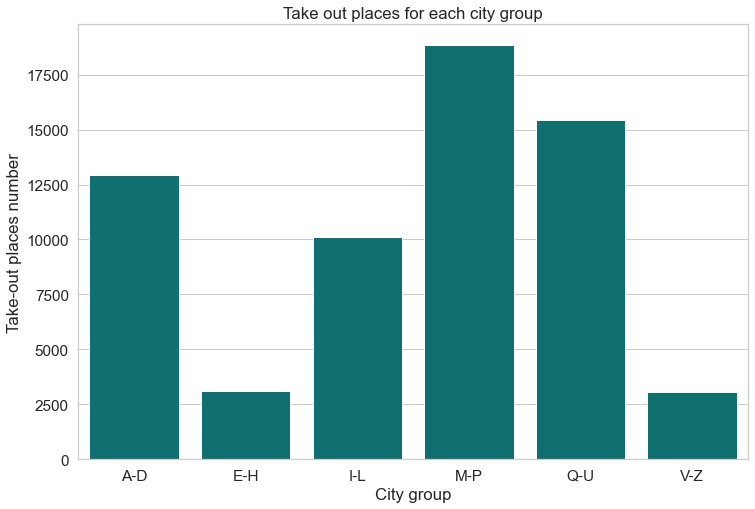

In [10]:
#Plotting the barchart
figure = plt.figure(figsize=(12,8))
sns.set_style("whitegrid")
barchart = sns.barplot(x = df_g.index, y = 'Number_of_take_out_places(City)', data = df_g, color = 'teal')
barchart.set(title='Take out places for each city group')
barchart.set_ylabel('Take-out places number')
barchart.set_xlabel('City group')
plt.show()

## Exercise e
 Plot the graphics as described in Figure 1.


For the scatter plots on the left three slightly different greens are used because they all refer to the same scatter plot even if with different constraints on the x and y axis. In the bar chart darker colours are used to higher values of the bar. For the correlation matrix is used the “vlag” diverging palette. For the scatter plot in the middle are used different colours and markers to distinguish it from the other scatter plots. In the pie-chart different colours are used for different values. In the last graph has been decided to plot the level of pollution and the group of rank of the cities, with a box plot to check the distribution of the city inside each rank group based on the pollution level and dots to display the actual value of pollution for each city. The saturation of the boxplot is lowered to better see the dots.

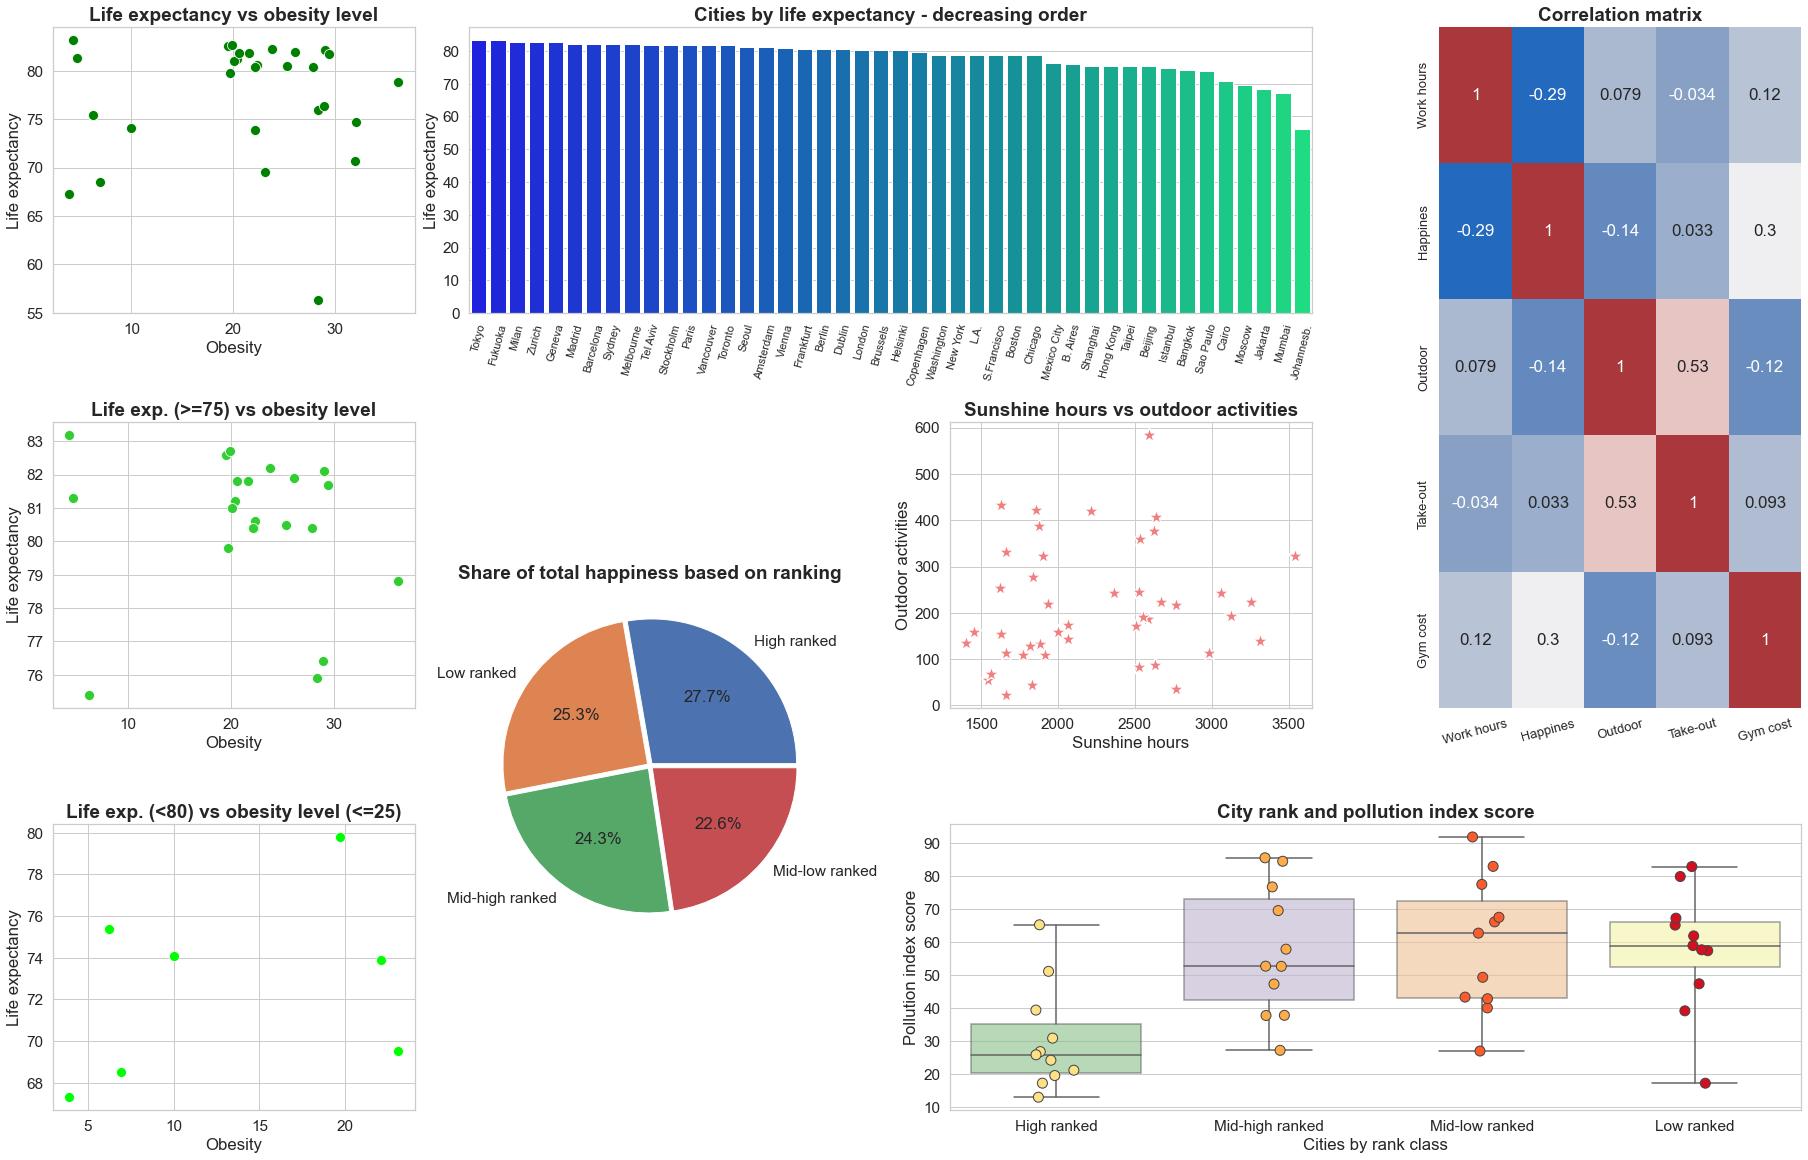

In [11]:
#creating the figure
main = plt.figure(constrained_layout=True, figsize=(25,16)) # If ``True`` use constrained layout to adjust positioning of plot elements.

#creating the grid for the subplots
gs = main.add_gridspec(3,4)

#First scatter plot
sns.set_style("whitegrid")
ax1 = main.add_subplot(gs[0,0])
ax1.set_title('Life expectancy vs obesity level', fontsize = 19, fontweight = 'bold')
sns.scatterplot(x='Obesity_levels(Country)', y='Life_expectancy(years)_(Country)', data=df, s = 100, color = 'green')
ax1.set_ylabel('Life expectancy')
ax1.set_xlabel('Obesity')

#Bar plot of life expectancy with bar in decreasing order
sns.set_style("whitegrid")
ax2 = main.add_subplot(gs[0,1:3])
ax2.set_title('Cities by life expectancy - decreasing order', fontsize = 19, fontweight = 'bold')
df2 = df.sort_values(by = 'Life_expectancy(years)_(Country)', ascending = False)
sns.barplot(x='City', y='Life_expectancy(years)_(Country)', data = df2,  palette='winter')
#Reducing the length of some city names for a better visualization
city = ['Tokyo','Fukuoka','Milan','Zurich','Geneva','Madrid','Barcelona','Sydney','Melbourne','Tel Aviv','Stockholm','Paris','Vancouver','Toronto','Seoul','Amsterdam','Vienna','Frankfurt','Berlin','Dublin','London','Brussels','Helsinki','Copenhagen','Washington','New York','L.A.','S.Francisco','Boston','Chicago','Mexico City','B. Aires','Shanghai','Hong Kong','Taipei','Beijing','Istanbul','Bangkok','Sao Paulo','Cairo','Moscow','Jakarta','Mumbai','Johannesb.']
ax2.set_xticklabels(city,rotation = 75, fontsize = 11)
ax2.set(xlabel=None, ylabel= 'Life expectancy')

#Correlation matrix of the last 5 variables
sns.set_style("whitegrid")
ax3 = main.add_subplot(gs[0:2,-1])
ax3.set_title('Correlation matrix', fontsize = 19, fontweight = 'bold')
df3 = df.iloc[:,-5:]
corr3 = df3.corr()
labels = ['Work hours','Happines','Outdoor','Take-out','Gym cost']
corr3.columns = labels
corr3.index = labels
sns.heatmap(corr3, annot = True, cbar=False, cmap = "vlag")
sns.set(font_scale=1.4)
ax3.set_xticklabels(ax3.get_xmajorticklabels(), rotation = 15, fontsize = 13)
ax3.set_yticklabels(ax3.get_ymajorticklabels(), fontsize = 13)

#Second scatter plot
sns.set_style("whitegrid")
ax4 = main.add_subplot(gs[1,0])
ax4.set_title('Life exp. (>=75) vs obesity level', fontsize = 19, fontweight = 'bold')
sns.scatterplot(x='Obesity_levels(Country)', y='Life_expectancy(years)_(Country)', data=df[df['Life_expectancy(years)_(Country)'].values >= 75], s = 100, color = 'limegreen')
ax4.set_ylabel('Life expectancy')
ax4.set_xlabel('Obesity')

#Pie model
sns.set_style("whitegrid")
ax5 = main.add_subplot(gs[1:,1])
#Assigning the rank category to each city. First is creating a list and then the list is added as a new column to the dataset
city_rank = []
for i in range(1,45):
    if i < 12:
        city_rank.append('High ranked')
    elif i >= 12 and i < 23:
        city_rank.append('Mid-high ranked')
    elif i >= 23 and i < 34:
        city_rank.append('Mid-low ranked')
    elif i >= 34 and i <45:
        city_rank.append('Low ranked')
df['City_Rank'] = city_rank
#reordering the columns, otherwise if the run cell is run again without the above part of the code the correlation matrix break because as last variable there is the "City_Rank column"
col5 = ['City_Group','City','City_Rank','Rank', 'Sunshine_hours(City)',
       'Cost_of_a_bottle_of_water(City)', 'Obesity_levels(Country)',
       'Life_expectancy(years)_(Country)', 'Pollution(Index_score)_(City)',
       'Annual_avg._hours_worked', 'Happiness_levels(Country)',
       'Outdoor_activities(City)', 'Number_of_take_out_places(City)',
       'Cost_of_a_monthly_gym_membership(City)']
df = df[col5]
#Grouping the cities by city rank
df_p = df.groupby('City_Rank').sum()
#actual plot of the pie
ax5.set_title('Share of total happiness based on ranking', fontsize = 19, fontweight = 'bold')
pie_labels = df_p.index.tolist()
data = df_p['Happiness_levels(Country)'].tolist()
plt.pie(x = data, autopct="%.1f%%", labels=pie_labels, pctdistance=0.6,explode=[0.02]*4)

#Foruth scatter plot
sns.set_style("whitegrid")
ax6 = main.add_subplot(gs[1,2])
ax6.set_title('Sunshine hours vs outdoor activities', fontsize = 19, fontweight = 'bold')
sns.scatterplot(x='Sunshine_hours(City)', y='Outdoor_activities(City)', data=df, s = 250, color = 'lightcoral', marker = '*')
ax6.set_ylabel('Outdoor activities')
ax6.set_xlabel('Sunshine hours')

#Third scatter plot
sns.set_style("whitegrid")
ax7 = main.add_subplot(gs[-1,0])
ax7.set_title('Life exp. (<80) vs obesity level (<=25)', fontsize = 19, fontweight = 'bold')
df7 = df[(df['Life_expectancy(years)_(Country)'].values <= 80) & (df['Obesity_levels(Country)'].values <= 25)]
sns.scatterplot(x='Obesity_levels(Country)', y='Life_expectancy(years)_(Country)', data=df7, s = 100, color = 'lime')
ax7.set_ylabel('Life expectancy')
ax7.set_xlabel('Obesity')

#Boxplot and Stripplot wth city rank and pollution level
sns.set_style("whitegrid")
ax8 = main.add_subplot(gs[-1,2:])
ax8.set_title('City rank and pollution index score', fontsize = 19, fontweight = 'bold')
sns.boxplot(data=df, x='City_Rank', y="Pollution(Index_score)_(City)", whis=np.inf, boxprops=dict(alpha=.6), palette='Accent')
sns.stripplot(data=df, x='City_Rank', y="Pollution(Index_score)_(City)", jitter=True, s = 10, palette='YlOrRd', edgecolor = "gray", linewidth = 1)
ax8.set_ylabel('Pollution index score')
ax8.set_xlabel('Cities by rank class')

plt.show()